In [1]:
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime as dt
import pandas_datareader.data as web
import ffn
import plotly.express as px
import yfinance as yf
from scipy.stats import norm

In [2]:
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'META', 
           'TSLA', 'JPM', 'WMT', 'BAC', 'NFLX']

weights = np.array([0.10] * len(tickers))
start = dt.datetime(2020, 1, 1)
end = dt.datetime.now()
data = pd.DataFrame()

for t in tickers:
    data[t] = yf.download(t, start, end)['Adj Close']

/Users/georgespyros/anaconda3/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
/Users/georgespyros/anaconda3/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
/Users/georgespyros/anaconda3/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[***

In [3]:
data.head()

,AAPL,GOOGL,MSFT,AMZN,META,TSLA,JPM,WMT,BAC,NFLX
Date,,,,,,,,,,
2020-01-02,73.059425,68.433998,154.493835,94.900497,209.557648,28.684000,124.254211,111.670387,32.273815,329.809998
2020-01-03,72.349144,68.075996,152.570099,93.748497,208.448837,29.534000,122.614479,110.684547,31.603706,325.899994
2020-01-06,72.925629,69.890503,152.964493,95.143997,212.374680,30.102667,122.517006,110.459229,31.558430,335.829987
2020-01-07,72.582657,69.755501,151.569763,95.343002,212.834183,31.270666,120.434128,109.435852,31.350153,330.750000
2020-01-08,73.750244,70.251999,153.984024,94.598503,214.991898,32.809334,121.373650,109.060318,31.667097,339.260010


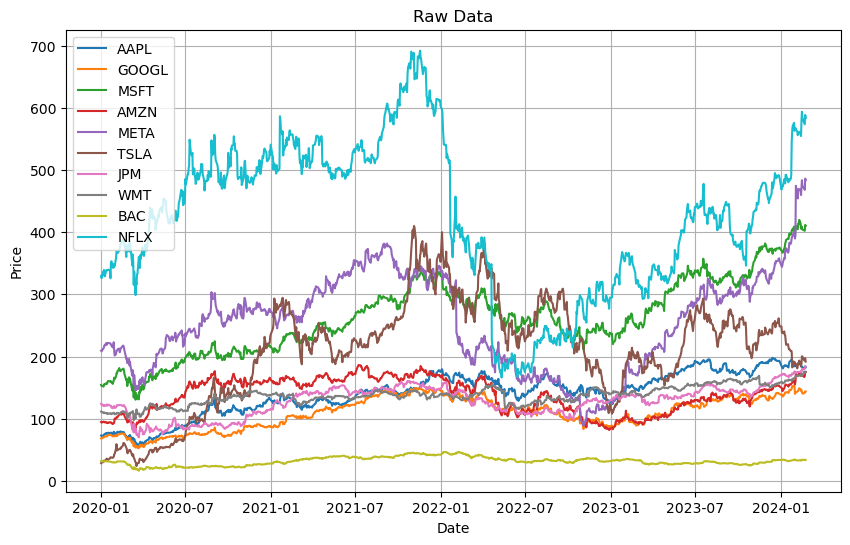

In [4]:
# Plot raw data
plt.figure(figsize=(10, 6))
for col in data.columns:
    plt.plot(data.index, data[col], label=col)
plt.title('Raw Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Historical Simulation Method

In [5]:
# Calculate returns
returns = data.pct_change()
returns

,AAPL,GOOGL,MSFT,AMZN,META,TSLA,JPM,WMT,BAC,NFLX
Date,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009722,-0.005231,-0.012452,-0.012139,-0.005291,0.029633,-0.013197,-0.008828,-0.020763,-0.011855
2020-01-06,0.007968,0.026654,0.002585,0.014886,0.018834,0.019255,-0.000795,-0.002036,-0.001433,0.030469
2020-01-07,-0.004703,-0.001932,-0.009118,0.002092,0.002164,0.038801,-0.017001,-0.009265,-0.006600,-0.015127
2020-01-08,0.016086,0.007118,0.015928,-0.007809,0.010138,0.049205,0.007801,-0.003432,0.010110,0.025729
...,...,...,...,...,...,...,...,...,...,...
2024-02-16,-0.008430,-0.015760,-0.006149,-0.001708,-0.022127,-0.002494,-0.004670,0.006321,0.000587,-0.016025
2024-02-20,-0.004114,0.004270,-0.003143,-0.014335,-0.003317,-0.030958,0.003910,0.032285,-0.003813,-0.015104
2024-02-21,0.004186,0.010133,-0.001514,0.009038,-0.006833,0.005213,0.006510,-0.012283,-0.007656,-0.003095


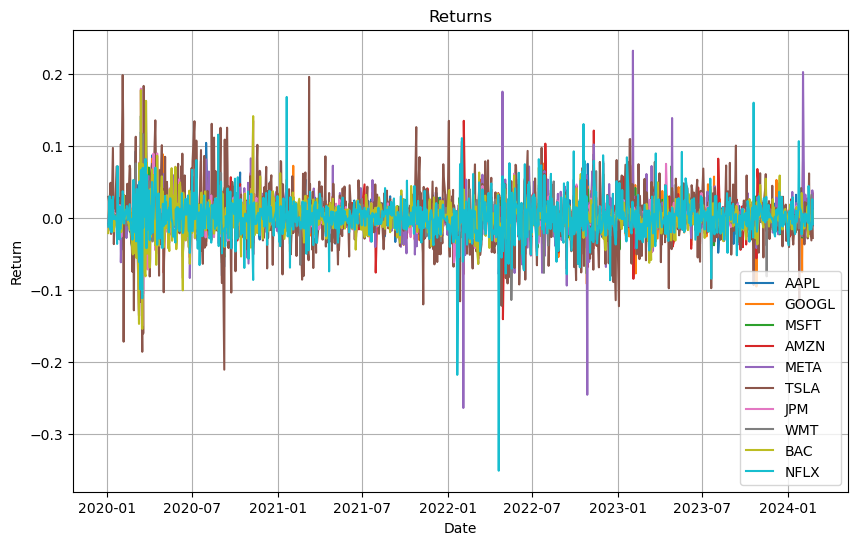

In [6]:
# Plot returns
plt.figure(figsize=(10, 6))
for col in returns.columns:
    plt.plot(returns.index, returns[col], label=col)
plt.title('Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Calculate weighted returns for each asset in the portfolio
weighted_returns_portfolio = returns.mul(weights,axis=1)

# Calculate portfolio returns
portfolio_returns = weighted_returns_portfolio.sum(axis=1).dropna()

# Convert portfolio returns to percentage returns
portfolio_returns_percentage = portfolio_returns * 100

# Calculate Value at Risk (VaR) at 95% and 99% confidence levels
var95 = np.percentile(portfolio_returns_percentage, 5)
var99 = np.percentile(portfolio_returns_percentage, 1)

print("Value at Risk (VaR) at 95% confidence level:", round(var95, 2), "%")
print("Value at Risk (VaR) at 99% confidence level:", round(var99, 2), "%")

Value at Risk (VaR) at 95% confidence level: -2.76 %
Value at Risk (VaR) at 99% confidence level: -4.84 %


# Variance - Covariance Method

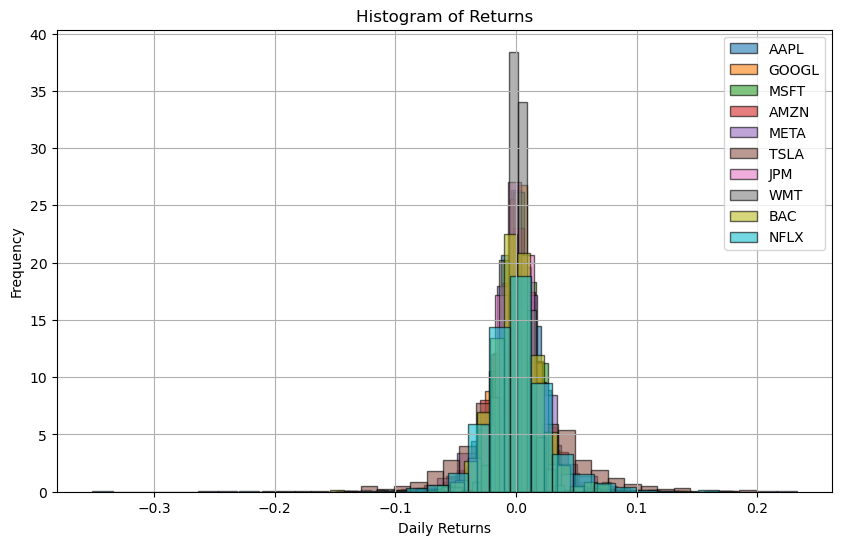

In [8]:
# Plot histograms of returns for each stock (static)
plt.figure(figsize=(10, 6))
for ticker in tickers:
    plt.hist(returns[ticker], bins=30, density=True, alpha=0.6, edgecolor='black', label=ticker)
plt.title('Histogram of Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Calculate covariance matrix
cov_matrix= returns.cov()
cov_matrix

,AAPL,GOOGL,MSFT,AMZN,META,TSLA,JPM,WMT,BAC,NFLX
AAPL,0.000437,0.000302,0.000328,0.000306,0.000367,0.000449,0.000202,0.000122,0.000220,0.000300
GOOGL,0.000302,0.000441,0.000329,0.000328,0.000415,0.000373,0.000196,0.000101,0.000218,0.000295
MSFT,0.000328,0.000329,0.000412,0.000326,0.000375,0.000404,0.000194,0.000120,0.000212,0.000301
AMZN,0.000306,0.000328,0.000326,0.000557,0.000434,0.000449,0.000135,0.000107,0.000161,0.000394
META,0.000367,0.000415,0.000375,0.000434,0.000887,0.000448,0.000209,0.000102,0.000235,0.000453
TSLA,0.000449,0.000373,0.000404,0.000449,0.000448,0.001808,0.000253,0.000096,0.000292,0.000490
JPM,0.000202,0.000196,0.000194,0.000135,0.000209,0.000253,0.000456,0.000082,0.000463,0.000132
WMT,0.000122,0.000101,0.000120,0.000107,0.000102,0.000096,0.000082,0.000216,0.000094,0.000109
BAC,0.000220,0.000218,0.000212,0.000161,0.000235,0.000292,0.000463,0.000094,0.000568,0.000146
NFLX,0.000300,0.000295,0.000301,0.000394,0.000453,0.000490,0.000132,0.000109,0.000146,0.000927


In [10]:
# Calculate average returns
avg_returns= returns.mean()
avg_returns

AAPL     0.001097
GOOGL    0.000935
MSFT     0.001144
AMZN     0.000865
META     0.001253
TSLA     0.002730
JPM      0.000604
WMT      0.000543
BAC      0.000330
NFLX     0.001029
dtype: float64

In [11]:
# Calculate portfolio mean return
portfolio_mean= avg_returns@weights

# Calculate portfolio standard deviation
portfolio_std= np.sqrt(weights.T@cov_matrix@ weights)

In [12]:
# Calculate Value at Risk (VaR) at 95% confidence level
confidence_level = 0.05
VaR_05 = norm.ppf(confidence_level, portfolio_mean, portfolio_std)

confidence_level = 0.01
VaR_01 = norm.ppf(confidence_level, portfolio_mean, portfolio_std)

print("Value at Risk (VaR) at 95% confidence level:",round(VaR_05 * 100, 2), "%")
print("Value at Risk (VaR) at 99% confidence level:",round(VaR_01 * 100, 2), "%")

Value at Risk (VaR) at 95% confidence level: -2.78 %
Value at Risk (VaR) at 99% confidence level: -3.98 %
